In [1]:
data = []
with open(r"D:\资料\短文本聚类研究\backup\train\medQA.train.txt", "r",encoding = 'utf-8') as f:
    
    line = f.readline()
    #line.split()
    while line: 
        data.append(line.split()[3])
        line = f.readline() 
data = list(set(data))
len(data)

50355

In [21]:
import jieba

data = []
with open(r"D:\资料\短文本聚类研究\backup\train\new 2.txt", "r",encoding = 'utf-8') as f:
    
    line = f.readline()
    #line.split()
    while line: 
        data.append(line.split()[3])
        line = f.readline() 
data = list(set(data))

newdata = []

for x in data:
    newdata.append(jieba.lcut(x))

def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords


def move_stopwords(sentence_list, stopwords_list):

    dd = []
    
    for word in sentence_list:
        out_list = []
        for tmp in word:
            flag = 0
            for _ in num:
                if _ in tmp:
                    flag = 1
                    break
            if flag == 1:
                continue
            if tmp not in stopwords_list:
                        out_list.append(tmp)
        dd.append(out_list)
    return dd

stopwords = stopwordslist(r"D:\资料\短文本聚类研究\backup\stopwords-master\stopwords-master\baidu_stopwords.txt")
num = ['1','2','3','4','5','6','7','8','9','0']
tmp = move_stopwords(newdata,stopwords)
remove_chars = '[·’!"\#$%&\'()＃！（）*+,-./:;<=>?\@，：?￥★、…．。＞【】［］《》？“”‘’\[\\]^_`{|}~]+1234567890'

tmp = move_stopwords(tmp,remove_chars)

findata = tmp

In [34]:
import pickle
with open(r"D:\资料\短文本聚类研究\backup\train\test.txt", 'wb') as f:
    pickle.dump(findata,f)

In [120]:
import pickle
with open(r"D:\资料\短文本聚类研究\backup\train\test.txt", 'rb') as text:
    data = pickle.load(text)

In [121]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import word2vec
model = word2vec.Word2Vec(data, size=200, window=5, min_count=3)

In [122]:
# 将训练好的模型保存到硬盘，文件名随意
model.save(r'D:\资料\短文本聚类研究\backup\train\data.w2v.model')

In [185]:
%%time
for x in range(10000):
    model.wv.similarity('宝宝', '孩子')

Wall time: 146 ms


In [124]:
len(model.wv.vocab.keys())

11723

In [150]:
for x in data:
    for y in x:
        if y not in model.wv.vocab.keys():
            #print("232")
            print(len(data))
            x.remove(y)

[0, 0, 0]

In [318]:
%%time
import time
alpha = 0.7
cnt = 0
def sim_jac(model, reference):
    jh = set(model) & set(reference)
    sameWordNum =  len(jh)
        
    allWordNum = len(model)+len(reference)-sameWordNum
    
    si_left= set(model) - (jh)
    sj_left= set(reference) - (jh)
    #y_tar = [0]*len(sj_left)

    S = []
    for x in si_left:
        for y in sj_left:
            sim = mm.wv.similarity(x, y)
            S.append([sim,[x,y]])
    
    num_set = []
    S.sort(key=lambda x:x[0],reverse=True)
    tmp = []
    for x in S:
        if x[0] < alpha:
            break
        if (x[1][0] in tmp) or (x[1][1] in tmp):
            continue
        tmp.append(x[1][0])
        tmp.append(x[1][1])
        sameWordNum  = sameWordNum + 1
        allWordNum = allWordNum - 1

    return sameWordNum/allWordNum

    return sameWordNum/allWordNum

total = []
for x in range(len(data[:500])): 
    t = []
    for y in range(len(data[:500])): 
        if y <= x:
            t.append(0)
        else:
            jaccard_coefficient = sim_jac(data[x],data[y])
            t.append(jaccard_coefficient) 
    total.append(t)

Wall time: 12min 1s


In [ ]:
%%time
import time
alpha = 0.6
cnt = 0
def sim_jac(model, reference):
    jh = set(model) & set(reference)
    sameWordNum =  len(jh)
        
    allWordNum = len(model)+len(reference)-sameWordNum
    
    si_left= set(model) - (jh)
    sj_left= list(set(reference) - (jh))
    y_tar = [0]*len(sj_left)
    S = []
    
    for x in si_left:
        for y in range(len(sj_left)):
            if y_tar[y]:
                break
            if mm.wv.similarity(x, sj_left[y]) > alpha:
                y_tar[y] = 1
                sameWordNum += 1
                allWordNum -= 1
                break
    
#     num_set = []
#     S.sort(key=lambda x:x[0],reverse=True)
#     tmp = []
#     for x in S:
#         if x[0] > alpha:
#             break
#         if (x[1][0] in tmp) or (x[1][1] in tmp):
#             continue
#         tmp.append(x[1][0])
#         tmp.append(x[1][1])
#         sameWordNum  = sameWordNum + 1
#         allWordNum = allWordNum - 1

    return sameWordNum/allWordNum

total = []
for x in range(len(data[:1000])): 
    t = []
    for y in range(len(data[:1000])): 
        if y <= x:
            t.append(0)
        else:
            jaccard_coefficient = sim_jac(data[x],data[y])
            t.append(jaccard_coefficient) 
    total.append(t)

In [299]:
np.array(total).shape

(100, 100)

In [319]:
%%time
import scipy
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import vq,kmeans,whiten
import numpy as np
import matplotlib.pylab as plt


#进行层次聚类:
N=sch.linkage(np.array(total),method='average') 



Wall time: 98.3 ms


<Figure size 720x360 with 0 Axes>

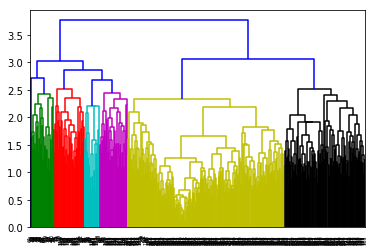

<Figure size 720x360 with 0 Axes>

In [399]:

P=sch.dendrogram(N)
plt.figure(figsize=(10,5))
#plt.plot()
#plt.savefig('plot_dendrogram.png')


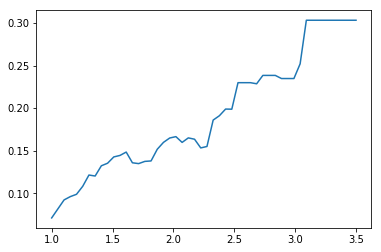

In [397]:
a = []
for x in list(np.linspace(1,3.5,50)):
    cluster= sch.fcluster(N,x,criterion='distance') 
    #print(cluster.shape)
    a.append(sklearn.metrics.silhouette_score(np.array(total),cluster))
plt.plot(list(np.linspace(1,3.5,50)),a)

In [407]:
cluster= sch.fcluster(N,2,criterion='distance') 
print(max(cluster))
sklearn.metrics.silhouette_score(np.array(total),cluster)

38


0.16656614103075945

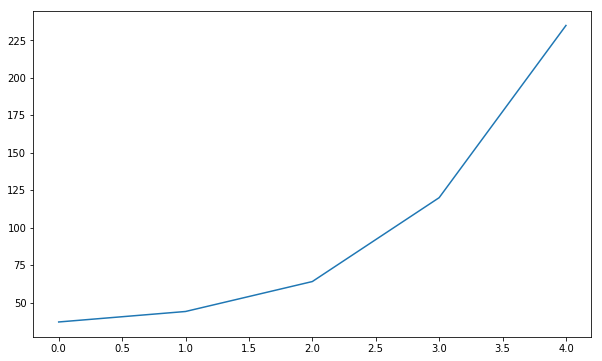

In [406]:
dict = {}
for key in list(cluster):
    dict[key] = dict.get(key, 0) + 1
#print(dict)
vv = []
for key,value in dict.items():
    vv.append(value)
vv.sort()
plt.figure(figsize=(10,6))
plt.plot(vv)

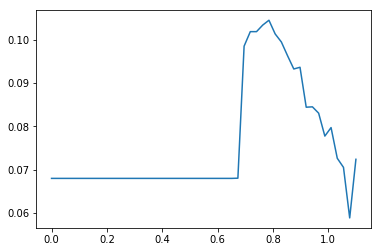

In [321]:
plt.plot( list(np.linspace(0,1.1,50)),a)

In [408]:
tmp = []
for i, x in enumerate(list(cluster)):
    if x == 5:
        tmp.append(data[i])
        print(data[i])

['我手', '损伤', '闹', '无意间', '手', '当初', '骨折', '一块', '撞', '石', '上', '手', '震', '缓', '半天', '很痛', '一会', '凉水', '好些', '稍微', '碰', '撞击', '地方', '骨折', '块', '很痛', '使劲', '碰', '感觉', '酸痛', '手', '还', '活动', '疼', '还', '说', '感觉', '软组织', '伤到', '骨头', '伤到']
['血栓', '闭塞性', '脉管炎', '危害', '老公', '今年冬天', '特别', '怕冷', '特别', '几天', '冷空气', '脚', '刺痛感', '晚上', '睡觉', '好', '几次', '都', '痛醒', '去', '看', '医生', '才', '血栓', '闭塞性', '脉管炎', '都', '吃', '中药', '调理', '真', '担心', '冬天', '都', '会', '样子', '希望', '血栓', '闭塞性', '脉管炎', '危害']
['新生儿', '鼻塞', '治疗', '我家', '宝宝', '出生', '没多久', '不', '小心', '感冒', '医院', '治疗', '感冒', '好', '流鼻涕', '晚上', '睡觉', '还', '伴有', '鼻塞', '两个', '鼻子', '都', '不', '通气', '都', '哭闹', '不肯', '人', '抱', '才', '肯', '睡', '床上', '没多久', '哭', '看着', '难受', '难受']
['晚上', '睡觉', '失眠', '老公', '段时间', '工作', '压力', '大', '每次', '下班', '回家', '都', '特别', '累', '晚上', '还', '睡不着', '觉', '有时候', '好不容易', '睡着', '还', '一会', '惊醒', '晚上', '睡不着', '都', '特别', '难受', '去', '医院', '检查', '毛病', '都', '吃', '调节', '神经', '药', '效果']
['浅表', '萎缩性', '胃炎', '伴', '糜烂', '年', '查出', '这病', '平时', '胃疼', '总',